# Tutorial "Algorithmic Methods for Network Analysis with NetworKit" (Part 3)

## Determining Important Nodes
There are a number of ways to measure the importance of nodes in a network. Possibly the easiest is the degree, i.e. the number of neighbors. In a social network, for example, a person who knows many others could be an important person. However, is this notion really meaningful? Probably not, since it does not consider the importance of the neighbors. Also, there is an interesting effect in social networks with respect to neighborhood sizes. Let us investigate this effect a little bit:

### Q&A Session #4
1. Do you think your number of online friends is above/below/on average? (You do not have to answer this question openly.)
**Answer (may be secret):**

2. What do you expect: How many people (in percent) in a social network have fewer friends than their friends on average?
**Answer (choose one):**
a)  0 -  25%
b) 26 -  50%
c) 51 -  75%
d) 76 - 100%

3. Use the Facebook graph. Compute for each vertex the average degree of its neighbors.
**Answer:**

4. Count the number of persons whose friends have on average more friends. What is their percentage in this network?
**Answer:**


In [9]:
%matplotlib inline
from networkit import *
import matplotlib.pyplot as plt

In [10]:
cd ~/Documents/workspace/NetworKit

/Users/Henning/Documents/workspace/NetworKit


In [11]:
%matplotlib inline

In [12]:
G = readGraph("input/MIT8.edgelist", Format.EdgeListTabZero)

In [13]:
def avgFriendDegree(v):
    """ Calculate the average degree of the neighbors of a node"""
    degSum = 0
    for u in G.neighbors(v):
        degSum += G.degree(u)
    return degSum / G.degree(v)

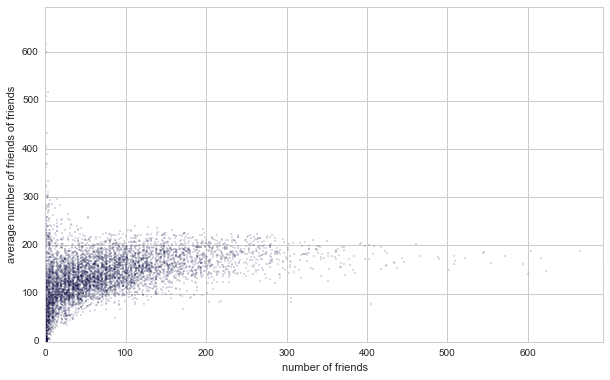

In [14]:
# Code for 3-3) and 3-4)
maxDeg = sorted(centrality.DegreeCentrality(G).run().scores(), reverse=True)[1]
plt.figure(figsize=(10,6))
plt.xlim(0, maxDeg)
plt.ylim(0, maxDeg)
plt.xlabel("number of friends")
plt.ylabel("average number of friends of friends")
plt.scatter(x=[G.degree(v) for v in G.nodes()], y=[avgFriendDegree(v) for v in G.nodes()], s=0.2,)

In [15]:
count = 0 # count the number of persons whose friends have on average more friends
count = 0 # count the number of persons whose friends have on average more friends
for v in G.nodes():
    if G.degree(v) < avgFriendDegree(v):
        count += 1
print("4-4): ", count / G.numberOfNodes())

4-4):  0.8608695652173913


Thus, **86% of the users in this network have fewer friends than their friends have on average**. While this result cannot be generalized exactly like this to other networks, the qualitative effect is often seen in social (and other) networks. Thus, let us now consider measures that broaden the rather narrow scope of the degree.

### $k$-core Decomposition
Thus, the next concept we consider is the $k$-core decomposition. To answer the following Q&A session, go back to the lecture slides.

### Q&A Session #5

1. What is the definition of an $i$-core? (Note that $k$ is often used for the largest core only!)
**Answer:**

2. Why do you think it can be considered a more robust measure for importance compared to the degree?
**Answer:**

3. Compute the $k$-core decomposition of the three networks used before. Then print the non-empty $i$-shells by using the method scores(). What results (similarities/differences) do you expect? Are these expectations met by the results?
**Answer:**

4. What disadvantage do you see when using $k$-core decomposition to rate nodes according to their importance?
**Answer:**

In [20]:
# Code for 5-3)
mit8 = readGraph("input/MIT8.edgelist", Format.EdgeListTabZero)
airf1 = readGraph("input/airfoil1.graph", Format.METIS)
gen = generators.ErdosRenyiGenerator(1000, 0.01)
er1000 = gen.generate()

for g in {mit8, airf1, er1000}:
    print(g.toString())
    coreDec = centrality.CoreDecomposition(g)
    coreDec.run()
    print(set(coreDec.scores()))

b'Graph(name=G#140, n=1000, m=5054)'
{2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
b'Graph(name=airfoil1, n=4253, m=12289)'
{3.0, 4.0}
b'Graph(name=MIT8, n=6440, m=251252)'
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0}


### Centrality Measures
The $k$-core decomposition is rather, as the name suggests, a decomposition of the vertices into discrete subsets. Nodes with the same coreness (i.e. in the same shell) have equal importance. Rankings where many vertices are equally important are often not very meaningful. That is why the $k$-core decomposition should *not* be interpreted as a *fine-grained* ranking mechanism.

### Q&A Session #6

1. Take the Facebook graph MIT8 and find the most central nodes. Take the relevance of their neighbors into account. Consider that MIT8 models a social network, not a web graph. Which algorithm would you choose? (Hint: Look at the lecture slides!)
**Answer:**

2. What are the 15 most important nodes according to the method in 1)?
**Answer:**

3. What other centrality measures do you recall?
**Answer:**


After you answered the questions, proceed with Tutorial #4.


In [ ]:
# Code for 6-1) and 6-2)
evc = centrality.EigenvectorCentrality(mit8)
evc.run()
evc.ranking()[:15]